In [1]:
#Skip gram model of embedding the words

#Given a sequence of words, the task is to label each of them with a suitable POS tag.
Step 1 : Import the data from brown corpus - The corpus has list of sentences in words for each of the sentences
step 2: import gensim for doing word processing using word2vec
step 3: Creating the word embeddings of 300 Dim using word2Vec method 

In [1]:
#Import the libraries
import pandas as pd
import os

In [2]:
#import natural language tool kit
import nltk
nltk.download('brown')
#Details aboout Brown Corpus

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\BrindhaM\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [4]:
!python -m pip install -U gensim

Requirement already up-to-date: gensim in c:\users\brindham\anaconda3\lib\site-packages (3.8.3)


You should consider upgrading via the 'C:\Users\BrindhaM\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import gensim

In [5]:
#import the brown corpus
from nltk.corpus import brown
#import the gensim model
from gensim.models import Word2Vec
#import multiprocessing for parallel processing
import multiprocessing

In [6]:
#point the sentences to sentences in brown corpus
sentences=brown.sents()
print(sentences[:2])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']]


In [7]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [8]:
news_text=brown.words(categories='news')
import nltk
fdist=nltk.FreqDist(words.lower() for words in news_text)

In [9]:
#Frequency of the words
fdist

FreqDist({'the': 6386,
          'fulton': 14,
          'county': 61,
          'grand': 19,
          'jury': 46,
          'said': 406,
          'friday': 41,
          'an': 311,
          'investigation': 11,
          'of': 2861,
          "atlanta's": 4,
          'recent': 20,
          'primary': 17,
          'election': 41,
          'produced': 6,
          '``': 732,
          'no': 120,
          'evidence': 17,
          "''": 702,
          'that': 829,
          'any': 94,
          'irregularities': 3,
          'took': 47,
          'place': 33,
          '.': 4030,
          'further': 18,
          'in': 2020,
          'term-end': 1,
          'presentments': 1,
          'city': 93,
          'executive': 18,
          'committee': 75,
          ',': 5188,
          'which': 245,
          'had': 281,
          'over-all': 2,
          'charge': 18,
          'deserves': 3,
          'praise': 2,
          'and': 2186,
          'thanks': 6,
          'atlanta':

In [12]:
#Conditional frequency distribution of the plot
cfd = nltk.ConditionalFreqDist(
            (genre,word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))
genres=['news', 'religion', 'hobbies', 'science_fiction']
modals=['Sports','love']
cfd.tabulate(conditions=genres,samples=modals)
         

                Sports   love 
           news      4      3 
       religion      0     13 
        hobbies      0      6 
science_fiction      0      3 


In [7]:
count=0
for words in brown.words():
    count=count+1
print("The count of the words in Brown Corpus",count)

The count of the words in Brown Corpus 1161192


In [14]:
#Train the model for embeddings
#use word2vec for training the embeddings

#define the parameters for word2Vec :
#size : size of the embedding dimensions
#window : the number of words around the target word for capturing the context/target
#min_count: the threshold of min fequency above which the embeddings will be applied
#negative : Negative samples drawn for every correct sample
#iter:Epochs for the training data
#workers : Worker threads for training the model


In [8]:
#Set the embedding dimension
EMB_DIM= 300
#Train the model
#W2V is the model
w2v=Word2Vec(sentences,size=EMB_DIM,window=5,min_count=5,negative=15,iter=10,workers=multiprocessing.cpu_count(),sg=1,seed=42)
#The initialization parameter sg controls the mode. If True-ish (sg=1), skip-gram is used; if False-ish (sg=0), CBOW is used

KeyboardInterrupt: 

In [6]:
w2v.save("Word2Vec.model")

NameError: name 'w2v' is not defined

In [8]:
#Set the embedding dimension
#EMB_DIM= 300
#Train the model
#W2V is the model
#w2v=Word2Vec(sentences,size=EMB_DIM,window=5,min_count=5,negative=15,iter=10,workers=multiprocessing.cpu_count())
#The initialization parameter sg controls the mode. If True-ish (sg=1), skip-gram is used; if False-ish (sg=0), CBOW is used

In [9]:
#Load the model
w2v=Word2Vec.load("Word2Vec.model")

In [10]:
#get the trained embeddings 
#w2v is the embedding matrix with wieght vectors
word_vectors=w2v.wv


In [39]:
for i,j in word_vectors.items():
    print(i)

AttributeError: 'Word2VecKeyedVectors' object has no attribute 'items'

In [11]:
#GET the vocab
vocab=list(word_vectors.vocab)
vocab=vocab[:1000]
print(vocab)


['The', 'Fulton', 'County', 'Grand', 'said', 'Friday', 'an', 'investigation', 'of', 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.', 'jury', 'further', 'in', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'deserves', 'praise', 'and', 'thanks', 'Atlanta', 'for', 'manner', 'was', 'conducted', 'term', 'been', 'charged', 'by', 'Superior', 'Court', 'Judge', 'to', 'investigate', 'reports', 'possible', 'won', 'Allen', 'Jr.', 'Only', 'a', 'relative', 'handful', 'such', 'received', 'considering', 'widespread', 'interest', 'number', 'voters', 'size', 'this', 'city', 'it', 'did', 'find', 'many', "Georgia's", 'registration', 'laws', 'are', 'or', 'inadequate', 'often', 'ambiguous', 'It', 'recommended', 'legislators', 'act', 'have', 'these', 'studied', 'revised', 'end', 'improving', 'them', 'grand', 'commented', 'on', 'other', 'topics', 'among', 'purchasing', 'departments', 'well', '

In [12]:
#The vocab representation of the words
for i,j in word_vectors.vocab.items():
    print(i,j.index)

The 14
Fulton 5615
County 1280
Grand 5377
said 59
Friday 1852
an 34
investigation 2586
of 3
recent 595
primary 1162
election 1521
produced 1206
`` 12
no 67
evidence 475
'' 13
that 8
any 84
irregularities 9647
took 220
place 188
. 2
jury 1754
further 499
in 7
the 0
City 762
Executive 8895
Committee 1235
, 1
which 35
had 25
over-all 3165
charge 869
deserves 5880
praise 5616
and 4
thanks 3917
Atlanta 3166
for 11
manner 838
was 10
conducted 2046
term 1391
been 48
charged 1962
by 24
Superior 5881
Court 960
Judge 2861
to 5
investigate 7781
reports 1407
possible 254
won 1604
Allen 4961
Jr. 1469
Only 1062
a 6
relative 2530
handful 6888
such 91
received 609
considering 2862
widespread 3602
interest 303
number 200
voters 5378
size 742
this 32
city 375
it 16
did 105
find 239
many 112
Georgia's 8896
registration 4438
laws 1247
are 29
or 31
inadequate 3421
often 285
ambiguous 4590
It 56
recommended 2411
legislators 5882
act 596
have 33
these 89
studied 1392
revised 6528
end 235
improving 5883
them 

Science 4049
& 612
addition 723
Rhode 1029
Island 756
Massachusetts 2246
Institute 2482
Technology 9666
captain 2537
basketball 9667
team 1351
football 3611
served 878
athletic 6906
High 3098
instructor 9668
associate 5629
professor 3937
border 6546
patrolman 11761
Signal 10574
Corps 1297
Army 1492
recommendation 4317
Chester 8300
O. 3711
racial 4318
discrimination 4444
employment 2538
called 238
yesterday 1376
blue 1121
ribbon 7343
dependent 2869
ADC 9669
Cook 4445
New 173
York 330
consulting 8301
firm 989
10 663
range 656
case 278
load 2483
serious 938
causes 1970
family 318
breakdown 6907
Must 8302
solve 4973
monthly 4974
100,000 8918
recipients 13195
Martin 2057
Co. 2315
We 146
problems 411
forced 1396
depend 2484
subsistence 8303
volume 921
cases 690
decrease 6225
community 451
able 446
deal 764
effectively 3099
limited 1065
skills 3009
color 747
underlying 5630
extension 3245
Other 1475
living 532
relatives 4758
parents 1352
preserving 10575
unity 1663
projects 1702
prevention 41

remains 1301
love 453
considered 676
mediocre 13246
nothing 272
fall 753
common 465
decency 8330
proud 2254
dead 599
regretted 7818
wrong 814
inject 13247
waged 10609
issues 1669
respond 4775
either 354
applause 6576
merit 3951
open 326
launched 4776
continuance 11801
passenger 6577
proper 1186
uses 1929
surplus 3952
Jersey 4335
attractive 2878
industry 625
unemployment 6250
share 1144
blame 3261
plant 853
until 214
am 431
income 1124
unhappy 4067
minutes 508
saved 2603
looks 1433
Administration 1930
transportation 2879
crises 4777
saying 940
ways 824
faced 2255
motor 2132
vehicles 2174
challenge 3176
stands 1704
resent 9692
reference 1670
president's 13248
insult 10610
twice 1671
overwhelmingly 10611
symbol 2102
intentions 4616
understand 749
seeking 2668
position 415
life 149
demonstrate 3817
judgment 1931
bad 736
taste 1975
vicious 5649
origin 2669
desire 1400
try 815
stature 6251
ahead 1015
Sandman 13249
May 970
opponents 7368
nomination 7369
addressing 8950
Military 5915
Newark 96

towel 11830
anyway 3026
frustrated 8342
losing 3825
token 8343
sort 627
acknowledge 7391
convey 6943
notion 2805
though 253
continued 777
extra 2256
unlikely 4791
conclusion 1901
purposes 1213
perfect 2072
acute 6944
interesting 1361
dilemma 4204
Since 569
constitution 7839
forbids 13280
introduction 3826
expenses 2369
prospect 4205
spending 2746
unpleasant 6265
avoid 2016
alternatives 5662
blocked 7392
trim 5928
arouse 13281
squeezed 5663
exert 7840
constant 1588
confronting 8344
tried 587
Any 2610
revive 9716
allegations 13282
followers 5664
affiliations 13283
depending 3537
combat 3956
Alexander 2500
Hemphill 9717
bids 13284
city's 5004
loss 1292
ranged 5416
Steel 10637
contracted 9718
legitimate 5929
competing 6266
covering 3447
contract 1902
Philadelphia 2257
investigating 9719
played 1058
reviewing 8964
signature 11831
Harold 3448
architecture 7841
engineering 2886
appeared 760
fired 2611
charges 2547
accepting 4792
contractor 11832
Director 4206
Donald 5005
cooperate 7842
sharp 

metropolitan 4636
amateur 4637
sponsorship 13379
charity 10686
tournaments 13380
Hogan 7872
Trophy 11894
Stuart 5964
Missouri 4814
golden 4226
blazing 11895
twelve 2509
Masters 7411
Open 6974
prize 5444
Year 9010
achieved 1809
monstrous 6975
human 333
brooding 6976
abandonment 8382
sport 5691
despair 4815
perfection 7873
commit 5965
nor 641
motivated 9011
athletics 11896
respects 4638
shooting 2377
below 786
par 6977
delivering 9012
margin 8383
narrow 1844
fairway 13381
majestic 9013
arc 2816
slice 7874
bounds 8384
hooked 11897
shots 3732
strokes 7412
wound 3838
dozen 2181
nice 1592
easily 1019
fell 1190
evil 1574
idol 11898
19 3460
secondary 3550
drank 5217
lunch 3461
gully 13382
ye 8385
echoes 9771
Palmer's 11899
honestly 7413
Nor 3121
knows 1114
code 4480
thoroughly 2966
handy 6978
flowed 11900
floated 10687
downstream 13383
picked 1418
potato 6297
lie 1941
naturally 2077
alongside 6298
spot 2022
confessed 10688
grin 6979
happened 701
intensity 2023
inherent 4093
humor 2442
strain 3

freight 4365
loading 7899
principally 8417
necessitated 7900
affect 3289
employees 1719
unions 3846
class 608
wages 2685
struck 1905
cab 7433
Mount 5987
victim 4102
Wiley 11943
38 7901
robbery 11944
attempted 3382
automatic 2904
store 1532
Negroes 1906
assaulted 11945
$150 11946
register 5227
choking 10737
burned 2822
seriously 2445
damaged 10738
Arundel 13446
arrival 4490
Annapolis 10739
burns 6309
Boy 10740
occurred 1649
mile 2686
south 1907
recording 3742
Jenkins 9046
discrepancies 13447
contained 1871
memory 1482
hate 2687
write 1033
machine 1116
permanent 2823
Commissioners 13448
bodies 1742
suits 4235
notes 2112
boards 2562
ambulance 11947
partially 4236
parked 3383
summoned 8418
deficiencies 8419
snow 2219
corrected 9047
Councilman 13449
Fifth 5988
dispatched 13450
storms 11948
longer 509
Werner 11949
north 1811
improvements 5228
slowly 995
operations 1404
manual 11950
laborers 11951
Work 10741
resumed 4491
parking 3559
tires 7902
chains 8420
overlooked 10742
merchants 5705
surv

weekly 4506
outlook 3203
one-third 6657
resistance 2455
buying 3755
renting 13568
narrowed 9112
saturation 13569
presumably 3307
jump 4507
1960's 10810
discrepancy 7941
invited 4119
businessmen 7050
Farm 7477
dealer 4385
battered 9113
chair 1688
50% 5488
20% 13570
Though 1724
experiencing 10811
climbing 8470
output 3204
acreage 8471
lowest 7051
yields 10812
dense 9114
efficiently 9862
supports 6658
pushing 5731
Seven 5253
averaging 9115
10% 10813
retail 5254
5% 12040
sections 1725
notable 5255
exceptions 4256
extends 7478
Farmers 10814
tractors 10815
gasoline 7942
appliances 9863
aren't 3564
conscious 2456
Sioux 9864
25% 12041
affects 5256
shipments 6334
Ltd. 13571
Toronto 12042
inventories 7479
demanding 5257
delivery 5732
trailed 9865
Government's 8472
feed 908
grain 3988
planted 7943
Nearly 10816
chiefly 4851
forecast 8473
economists 13572
incentive 7480
receipts 10817
index 1463
depletion 12043
pipe 5061
clay 1308
figuring 12044
taxable 10818
percentages 12045
materials 1161
produc

mere 2395
binding 5078
rounded 6692
choke 9169
perennial 12126
Vice 6379
virtually 2838
presiding 12127
painful 4266
chore 10898
declaration 9940
tight 3875
Player 3401
lap 5512
disbelief 12128
licked 8530
bite 8531
midway 13682
holes 2991
Augusta 12129
teeth 1075
34 4874
washed 3320
15th 6693
putt 12130
scrambled 9170
tears 3494
sand 3876
slope 5285
tower 7510
Coe 13683
hasty 13684
recover 7989
visibly 12131
putting 2227
beside 1466
Roberts' 7511
stared 1881
amazement 8532
rounds 7095
comfortable 3068
closest 9171
lean 5079
disappointing 10899
intact 6694
deliberate 6380
Half 7512
Unlike 9172
spontaneously 9173
sight 1327
prestige 4000
somewhere 2396
paired 12132
chapter 3069
whichever 13685
awed 13686
rivalry 12133
instantly 5513
moist 7990
boldly 9941
consequences 3209
enormous 3070
unquestionably 9174
essentially 2638
shaky 13687
accurate 3210
gray 1750
ugly 4875
focus 2839
destined 9175
conspicuously 9942
bogey 13688
Starting 10900
roar 7096
landscape 5080
answered 1654
moments 23

enjoyment 4887
aim 3147
ironic 7548
concept 1295
militant 9987
minority 5095
seal 5779
overwhelming 5297
Twice 9988
backing 9989
sturdy 6397
habitat 6720
flourished 12194
forceful 9990
classify 12195
Deal 9218
Frontier 13775
persuasion 9219
politician 7123
theirs 5298
audiences 6075
nod 8025
dramas 12196
chin 4406
gripping 12197
chatter 10960
persuading 13776
patiently 9991
generations 4531
coincided 12198
loved 2042
revolution 2640
fighter 9220
recall 2921
hopeless 6721
partisan 7549
presidents 12199
campaigns 5780
banner 12200
jungle 5521
murderers 13777
river 1439
excuse 4407
mistaken 5781
Italians 10961
savages 12201
Does 2846
contrary 2467
piled 6076
Mass 9221
troop 9222
adventures 7550
sanction 8026
occurrences 8562
anarchy 10962
incapable 8563
commanding 9223
wake 4532
ruin 6722
Right 6077
invade 13778
weak 3499
reasonably 3325
mandate 12202
inconsistent 13779
realism 4533
courage 3500
magnitude 3774
urge 5096
Otherwise 5782
blindly 9992
editorial 2770
secured 8027
misplaced 109

1883 12260
congressman 12261
trace 4545
messages 6096
congratulations 13866
youngster 10029
academy 12262
managerial 8596
cohesion 12263
simultaneously 3506
translation 6097
Scriptures 11037
Version 12264
Biblical 6410
32 7145
Yale 7146
Divinity 13867
depth 2163
repetition 7147
readings 6098
clarity 3896
archaic 13868
phrases 5539
verses 9260
baptized 7566
thee 6099
thou 10030
answering 6744
righteousness 12265
heavens 9261
Spirit 4701
descending 8597
lighting 5306
teachings 12266
uttered 13869
blessing 8598
Heaven 5106
angel 9262
bishop 13870
attain 5107
comprehension 11038
Hebrew 8599
writings 6411
usable 10031
Congregational 11039
Churches 6745
airy 12267
styles 5540
textures 12268
tapered 11040
elongated 13871
toe 9263
Wine 13872
tailored 9264
pumps 13873
blend 10032
oval 11041
throats 12269
crisp 10033
basket 5801
casual 4702
cork 9265
sandals 13874
foam 3076
padded 13875
lemon 6746
brighter 10034
dip 13876
tan 11042
straw 6412
collar 5802
bow 6747
throat 2847
toothbrush 12270
raz

indebted 8669
artistically 14043
conceived 4149
concluding 11161
Low 7197
acquainted 7606
robe 12408
Nazis 7607
lightning 7608
Hitler 10142
rarely 2927
wrath 10143
Eden 9334
puny 14044
vices 14045
moderately 12409
tart 11162
fox 9335
rat 12410
Doc 5329
territorial 7609
themes 10144
dialect 8670
Joel 7610
characterization 10145
reliable 4722
possesses 10146
Kennan 11163
revolutions 11164
pessimistic 12411
circumstance 7611
persisted 8671
Yalta 6781
architects 10147
possessed 4723
childish 8110
treason 12412
dashed 10148
achieving 6782
objectives 2928
enemy's 10149
disadvantages 10150
complications 14046
negotiated 11165
eliminated 4724
eastern 8111
vain 8672
bitterness 5826
ignorance 6783
Roosevelt's 14047
sketch 6139
glancing 10151
seizure 12413
justly 14048
precise 3588
author's 11166
pity 7612
oppression 12414
forehead 6140
stare 6784
endowed 11167
cards 3414
fever 5330
jagged 14049
ambassador 9336
Yugoslavia 14050
portray 12415
prescribe 14051
narrator 8112
flashes 9337
fists 7198
i

unavoidable 11246
latent 9373
flock 11247
smug 12489
assuming 7219
implied 5832
Greeks 14183
yes 2087
unpaid 10213
richly 14184
despise 11248
aligned 12490
Barth 14185
Whitehead 11249
modernity 12491
enduring 8718
formulations 8142
formulate 9374
liberalism 7220
Whereas 8719
Continent 12492
exclude 11250
P 2408
indifferent 8143
excluded 10214
mutually 7221
analogous 10215
accepts 12493
Anglican 8144
communion 8720
fruit 3508
popularly 11251
1861 10216
Universe 10217
arriving 7640
present-day 5833
Englishmen 10218
implying 11252
utmost 11253
longest 12494
mornings 8721
medieval 5834
priest 6149
congregation 2473
falling 3695
rolls 8722
tenth 14186
260 14187
decreasing 12495
clergyman 8723
Protestantism 8145
someday 10219
mapping 11254
thy 11255
fold 12496
Faith 10220
Fathers 9375
endured 8146
Mary's 8724
Shall 6799
embarrassment 10221
ecclesiastical 10222
depicting 12497
clergymen 12498
immigrants 8725
symbolize 9376
circle 1960
formulated 8147
Irenaeus 6800
identifies 12499
spiral 1022

drilling 8753
contacts 4431
nuts 4936
twisted 5346
insert 7237
screw 5141
Number 14321
slots 14322
Cut 7671
flush 8177
slot 12601
underside 14323
lifting 11334
progresses 12602
accessible 14324
rotating 8178
File 12603
triangular 14325
files 7238
'round 14326
equations 9433
multiplication 14327
subtraction 12604
fractions 5347
simplified 9434
constants 9435
displacement 4735
boring 14328
cylinders 11335
piston 11336
computing 9436
cylinder 6168
centimeters 10284
compression 12605
combustion 7672
liquid 2410
liquids 12606
thickness 2584
irregularly 14329
axle 14330
tire 5142
simplify 9437
substituted 6481
radius 9438
measurement 3511
rpm 12607
stable 3699
Dale 14331
Hanover 1696
Tar 8754
colt 7239
brood 9439
mare 7673
Fury 14332
Hoot 11337
Caper 14333
2:35 9440
trot 7674
thrived 14334
Thor 9441
harness 8755
paced 8756
Adios 12608
masculine 11338
2:36 7675
fine-looking 14335
Direct 11339
trotted 11340
2:37 11341
Faber 14336
Martha 14337
Jet 8757
Precious 9442
Rich 14338
baffled 14339
roc

fantasy 7699
celestial 10327
1819 11396
reckon 14455
salts 12697
pursue 5149
faculties 14456
esteem 14457
magnetism 11397
similarity 9483
fuse 14458
vapor 8201
electrostatic 10328
Electrical 11398
polarity 14459
Drug 12698
drugs 3911
assumes 10329
bacterial 7260
diarrhea 11399
incidence 11400
bloat 10330
grams 5592
scours 14460
0.1 9484
severity 14461
0.5 9485
onset 6490
disappear 8202
Drug's 6491
Aureomycin 14462
reduces 12699
infections 14463
rot 10331
milligram 14464
calves 14465
infection 10332
abortion 12700
gram 9486
consuming 14466
lambs 11401
creep 8784
Caution 14467
enzymes 8203
enzyme 12701
preparations 6842
utilization 9487
reproduction 12702
pasture 8785
ketosis 12703
sodium 8204
elevator 7700
construct 8205
sixties 8206
intensification 11402
Frequently 12704
distributor 11403
Increased 14468
enhance 14469
headaches 12705
economies 11404
evaluated 8207
Technical 14470
quantitative 9488
qualitative 14471
beverage 14472
wrapped 6843
defining 9489
politeness 14473
necessities 

swollen 7722
earthquakes 11471
calculations 9528
Garryowen 6855
cavalry 6183
trooper 12799
7th 7723
Fighting 9529
saloon 8823
Mel 10388
ridden 12800
swivel 14602
Depot 8824
Custer 14603
troopers 14604
Goulding 11472
Leyte 12801
platoon 11473
hurling 14605
G 7274
Okay 6856
battlefield 14606
graphic 14607
oppressed 14608
abreast 14609
reputed 14610
backwoods 14611
isolation 6184
mask 9530
violently 7724
misunderstood 12802
pretended 12803
decisively 14612
rattle 14613
thumping 14614
shutters 14615
newspaperman 12804
blackened 14616
siege 14617
ambush 11474
Educational 14618
Scientific 14619
Cultural 12805
Jeep 7275
Frenchman 10389
stiffened 10390
spinning 8227
life's 12806
barefoot 11475
bouncing 9531
bush 8825
traversed 12807
coatings 7725
self-help 6503
elders 9532
strode 8826
dusty 6185
pet 10391
happiness 4742
wrists 12808
antiseptic 12809
weakening 12810
beards 14620
ancestral 14621
parents' 12811
clinical 4032
marry 5598
peripheral 10392
academically 14622
counterparts 8228
sexes 8

Weston 10439
generalized 9565
doctor's 5603
mattered 14812
taut 10440
awaken 11577
hormone 7296
maternal 14813
writ 11578
tact 14814
indulged 14815
eyed 11579
sparse 14816
Poet 3597
Lilian 11580
urgently 12934
transactions 14817
broadly 12935
scout 12936
Bang-Jensen 4304
Bang-Jensen's 12937
hairy 14818
glared 14819
Shann 9566
Manley 12938
Caravan 14820
Heard 11581
Adoniram 12939
trousers 11582
chimney 11583
chattering 12940
Whig 12941
Tories 12942
Steele 4953
Molesworth 11584
Steele's 7742
Succession 11585
Crisis 14821
pretentious 12943
asserts 14822
whoever 14823
showered 14824
reviews 9567
parliamentary 10441
Arlen 7297
Mercer's 10442
monacle 14825
allusions 14826
stall 5866
Herford 14827
Hearst's 12944
Hetman 7743
Hetman's 10443
Hearst 2356
Baer 14828
shadowing 14829
lady's 14830
monkey 9568
make-up 14831
telephones 14832
wrinkled 7744
brow 12945
fruitless 14833
brandishing 14834
grunted 9569
Mama 2654
banister 14835
stairway 12946
wrist 9570
Jack's 8254
accompany 10444
lungs 5156
E

tangents 13051
C' 14996
secant 7765
pertains 14997
equate 11646
reassured 14998
helplessness 14999
Johnnie 4174
referral 13052
regression 11647
casework 7313
Brandywine 11648
subsystems 9604
subgroups 15000
AIMO 15001
Ruanda-Urundi 10497
Kohnstamm-negative 9605
Kohnstamm-positive 7314
Kohnstamm 7315
arm-elevation 13053
unstructured 7766
compulsivity 7316
Scale 15002
I.Q. 15003
descriptive 13054
roleplaying 7317
questionnaires 13055
suitcase 5160
receptionist 15004
hebephrenic 11649
cheeks 7318
Granny 13056
schizophrenic 13057
text-form 8869
grammatical 9606
semantic 11650
lookup 11651
Text 13058
W-region 15005
syllables 11652
modifier 15006
declarative 11653
consonantal 10498
vowel 13059
phonologic 8870
phonology 15007
intonation 10499
phonemic 10500
morphophonemic 13060
morphophonemics 9607
orthography 13061
Athabascan 7319
Yokuts 11654
Swadesh 10501
verbs 11655
nail 15008
Lublin 6519
corridor 5870
aberrations 15009
electoral 8268
long-run 15010
Istiqlal 8871
Balafrej 15011
U.N.F.P. 1

In [13]:
#print the vectors shape post the training 
word_vectors.vectors.shape
#Compare this with original vocab size of ~1161192
#1.3% of original vocabulary is retained


(15173, 300)

In [14]:
#Vectors for the different words
word_vectors.vectors

array([[ 0.14143984, -0.06803824,  0.184393  , ...,  0.08023538,
         0.10810094, -0.08917741],
       [ 0.34472135, -0.05301099,  0.09041218, ...,  0.05838839,
        -0.00579977, -0.23796007],
       [ 0.16417782,  0.04655231,  0.02733903, ...,  0.23397845,
         0.21111545, -0.09255654],
       ...,
       [ 0.09115402, -0.12034506, -0.04584361, ...,  0.07240134,
         0.0475884 ,  0.04863478],
       [ 0.13145816, -0.13612768, -0.00976463, ..., -0.02596147,
        -0.00103161, -0.07584613],
       [ 0.17165014, -0.10681411, -0.06679516, ...,  0.01085849,
         0.07959346, -0.01352228]], dtype=float32)

In [15]:
#apply the functions
result=word_vectors.similar_by_word("Saturday")
print("Most similar words to 'Saturday':\n",result[:3])

result=word_vectors.similar_by_word("money")
print("Most similar words to 'Money':\n",result[:3])

result=word_vectors.similar_by_word("child")
print("Most similar words to 'child':\n",result[:3])

result=word_vectors.most_similar(positive=['child'],negative=['person'])
print("Most similar words to 'child' but dissimilar to 'person':\n",result[:3])

result = word_vectors.doesnt_match("Saturday Wednesday Food".split())
print("Odd man out:\n",result)

result = word_vectors["child"]
print("Numy vector rep for the word child is :\n",result)

Most similar words to 'Saturday':
 [('Sunday', 0.8205392360687256), ('Friday', 0.8174380660057068), ('Wednesday', 0.7991936802864075)]
Most similar words to 'Money':
 [('clothing', 0.652639627456665), ('repay', 0.6496089696884155), ('unemployment', 0.6455485224723816)]
Most similar words to 'child':
 [('teacher', 0.6766624450683594), ('autistic', 0.6743035316467285), ('temper', 0.6723817586898804)]
Most similar words to 'child' but dissimilar to 'person':
 [('children', 0.2810821533203125), ('health', 0.2737591862678528), ('fever', 0.2313023805618286)]
Odd man out:
 Food
Numy vector rep for the word child is :
 [ 0.24972191 -0.3348287   0.17172562 -0.24653614 -0.11415448  0.04901123
 -0.30275226 -0.15688747 -0.01408158 -0.12580849  0.26084846  0.28095633
  0.09134301  0.01772306 -0.160127   -0.16246857  0.22818233  0.19497809
  0.31835875 -0.12774217 -0.25051245 -0.00518931 -0.11919818  0.14593425
  0.14408255 -0.17651492  0.2761898  -0.11265213 -0.00625727 -0.2068525
  0.0353156   0.0

C:\Users\BrindhaM\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [16]:
#use the embeddings for POS tagging model
#few POS tags are noun,verbs and adjective/adverb
X_pca=word_vectors.vectors[0:1000]


# T distrbuted stochastic neigbour embedding Visualzation

In [17]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2).fit_transform(X_pca)
tsne.shape

(1000, 2)

In [18]:
df = pd.DataFrame(tsne, index=vocab,columns=['X','Y'])
#view the df
df

,X,Y
The,-8.001928,2.581465
Fulton,-8.182153,3.452364
County,-7.733426,3.269252
Grand,-6.575189,1.830832
said,-8.364280,3.001818
Friday,-21.884680,24.915255
an,-5.814283,-3.533293
investigation,-7.171046,1.958267
of,-25.756506,-7.779932
recent,1.567419,-12.736977


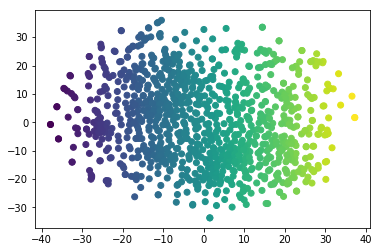

In [22]:
#Visualize the TSNE plot
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
#%matplotlib inline
ax.scatter(df['X'],df['Y'],c=df['X'])
#label the data
#ax.set_xlim(-40,40)
#ax.set_ylim(-30,30)
plt.show()

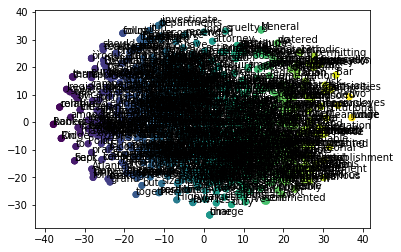

In [27]:
#Visualize the TSNE plot with data labels
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
#%matplotlib inline
ax.scatter(df['X'],df['Y'],c=df['X'])
#label the data
#ax.set_xlim(-40,40)
#ax.set_ylim(-30,30)
#df.iterrows() will retrive the row index, clumn value as series
for word,pos in df.iterrows():
    ax.annotate(word,pos)
ax.scatter(df['X'],df['Y'],c=df['X'])
plt.show()

In [28]:
#use the CONLL data
import nltk
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\BrindhaM\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

In [68]:
from nltk.corpus import conll2000
cp=nltk.RegexpParser('')
test_sent=conll2000.chunked_sents('test.txt',chunk_types=['NP'])
print(cp.evaluate(test_sent))
#The IOB tag accuracy indicates that more than a third of the words are tagged with O, i.e. not in an NP chunk


ChunkParse score:
    IOB Accuracy:  43.4%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%


In [69]:
#Naive regular expression chunker -tags beginning with letters that are characteristic of noun phrase tags (e.g. CD, DT, and JJ).
grammar=r"NP: {<[CDJNP].*>+}"
cp=nltk.RegexpParser(grammar)
print(cp.evaluate(test_sent))

ChunkParse score:
    IOB Accuracy:  87.7%%
    Precision:     70.6%%
    Recall:        67.8%%
    F-Measure:     69.2%%


In [29]:
#import the conll2000 data
from nltk.corpus import conll2000
#import the gensim model
from gensim.models import Word2Vec
#import the keras mdels
from tensorflow.keras.layers import Dense,Embedding,Activation,Flatten
#sequential model
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import collections

C:\Users\BrindhaM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\BrindhaM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\BrindhaM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\BrindhaM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWa

In [30]:
#get the tokenized words along with pos tags from the corpus
train_words=conll2000.tagged_words('train.txt')
#test words
test_words=conll2000.tagged_words('test.txt')
#print sample
print(train_words[:50])

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ('pound', 'NN'), ('is', 'VBZ'), ('widely', 'RB'), ('expected', 'VBN'), ('to', 'TO'), ('take', 'VB'), ('another', 'DT'), ('sharp', 'JJ'), ('dive', 'NN'), ('if', 'IN'), ('trade', 'NN'), ('figures', 'NNS'), ('for', 'IN'), ('September', 'NNP'), (',', ','), ('due', 'JJ'), ('for', 'IN'), ('release', 'NN'), ('tomorrow', 'NN'), (',', ','), ('fail', 'VB'), ('to', 'TO'), ('show', 'VB'), ('a', 'DT'), ('substantial', 'JJ'), ('improvement', 'NN'), ('from', 'IN'), ('July', 'NNP'), ('and', 'CC'), ('August', 'NNP'), ("'s", 'POS'), ('near-record', 'JJ'), ('deficits', 'NNS'), ('.', '.'), ('Chancellor', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('Exchequer', 'NNP'), ('Nigel', 'NNP'), ('Lawson', 'NNP'), ("'s", 'POS'), ('restated', 'VBN'), ('commitment', 'NN'), ('to', 'TO'), ('a', 'DT'), ('firm', 'NN'), ('monetary', 'JJ')]


In [31]:
x=conll2000.sents()
x[:2]

[['Confidence', 'in', 'the', 'pound', 'is', 'widely', 'expected', 'to', 'take', 'another', 'sharp', 'dive', 'if', 'trade', 'figures', 'for', 'September', ',', 'due', 'for', 'release', 'tomorrow', ',', 'fail', 'to', 'show', 'a', 'substantial', 'improvement', 'from', 'July', 'and', 'August', "'s", 'near-record', 'deficits', '.'], ['Chancellor', 'of', 'the', 'Exchequer', 'Nigel', 'Lawson', "'s", 'restated', 'commitment', 'to', 'a', 'firm', 'monetary', 'policy', 'has', 'helped', 'to', 'prevent', 'a', 'freefall', 'in', 'sterling', 'over', 'the', 'past', 'week', '.']]

In [32]:
#print the size of word vocsbulry
len(train_words)

211727

In [33]:
#print the total number of sentences
len(x)

10948

In [34]:
#generte unique pos
def get_tag_vocabulary(tagged_words):
    #accept in the form of (word,tags) and return unique pos tags with unique ids
    tag2id={}
    for item in tagged_words:
        #form - item,pos tag => tag is item[1]
        tag=item[1]
        #setting up the unique pos tag nd the value for the same
        #setdefault:
        #if keys not present,inserts the key along with key value of # of keys present in dict 
        #if key prsent,dont make any update
        tag2id.setdefault(tag,len(tag2id))
        #return
    return tag2id

In [35]:
#the word_vectors.vocab dictionary stores Vocab objects rather than integers
#we want the dictinary to map words to inegers
word2id={k:v.index for k,v in word_vectors.vocab.items()}
#for con112000 dataset,store all the unique tags and correspnding values in tag2id dictionary
tag2id=get_tag_vocabulary(train_words)
#print the tag2id
#print(tag2id)

In [36]:
#function to repalce all words in tagged words with index from word2id and tags with tag fr tag2id
def get_int_data(tagged_words,word2id,tag2id):
    #X to hold ids of the words
    #Y to hold ids o the tags
    X,Y=[],[]
    unk_count=0 #To keep track of unknown wrds representation
    for word,tag in tagged_words:
        #dict..get to return the values for the keys
        Y.append(tag2id.get(tag))
        if word in word2id:
            X.append(word2id.get(word))
        else:
            #word in corpus not present in embedding (trained)
            unk_count+=1
    print("Data created.Pecentage of unknwon words: %.3f" %(unk_count/len(tagged_words)))
    return np.array(X),np.array(Y)
    
            

In [52]:
#set the train and test set
X_Train,Y_Train=get_int_data(train_words,word2id,tag2id)
#set the test set
X_Test,Y_Test=get_int_data(test_words,word2id,tag2id)
#~.14 % of words habe no representation in tersm of tags

Data created.Pecentage of unknwon words: 0.143
Data created.Pecentage of unknwon words: 0.149


In [53]:
#to set right the problem of unknown words 
#lets add the common term UNK to our vocabulary
#approximate UNK vector with mean of all embeddings
def add_new_word(new_word,new_vector,new_index,embedding_matrix,word2id):
    #add a new word to existing embedding matrix along the wor
    embedding_matrix=np.insert(embedding_matrix,[new_index],[new_vector],axis=0)
    
    #updaing the index of word that follow the new word
    #Every addinton in embedding matrix will have corresponding addition in word2id
    word2id={word:(index+1) if index >= new_index else index 
            for word,index in word2id.items()}
    #adding the new word as part of word2id dictionary
    word2id[new_word]=new_index
    return embedding_matrix,word2id



In [42]:
#ssociate unknown word with index 0
UNK_INDEX=0
UNK_TOKEN= 'UNK'

#assign the embedding matrix with vectors from word
embedding_matrix=word_vectors.vectors
#vector/index are diffrent in wor2vec
unk_vector=embedding_matrix.mean(0) 
#print the mean  value of vector across the columns ( 300 columns since 300 dimensions)
print(unk_vector)
embedding_matrix,word2id=add_new_word(UNK_TOKEN,unk_vector,UNK_INDEX,embedding_matrix,word2id)

[ 0.14439283 -0.06920674 -0.00865008 -0.18814936 -0.17191303 -0.01147699
 -0.00867014 -0.02920532 -0.04598523 -0.07943383  0.00568458  0.04192553
  0.00759649 -0.04620024 -0.09014685 -0.00158312  0.04225028  0.0930832
  0.03432184  0.04020489  0.05554649 -0.01242069  0.08259725 -0.1175331
  0.04869303 -0.18189593 -0.01890814  0.04100093 -0.00214505 -0.01253799
 -0.01283228  0.07822512 -0.06901541 -0.09943992 -0.02287875  0.15020496
  0.0042211  -0.14188302 -0.09746271 -0.09050915 -0.02701    -0.17526063
 -0.18831322 -0.01965786 -0.05593216 -0.09207086 -0.08180635  0.00943084
 -0.05172617 -0.2096362   0.06432027  0.06157157  0.0500511  -0.0696902
 -0.04250211  0.08576909  0.05392141  0.05382942  0.01584114 -0.06425181
  0.01629193  0.00264414 -0.10205561  0.066003    0.16908394  0.02453339
  0.00899655 -0.0411165  -0.09848602  0.09503114 -0.08273897 -0.06458087
 -0.08014874 -0.05184146 -0.07120843 -0.02381824 -0.16814208 -0.1149013
 -0.05444511  0.01583816 -0.16534455 -0.09862343 -0.054

NameError: name 'add_new_word' is not defined

In [43]:
#assign the out of vocab with UNK index
#modif the ge_int_Daatt function
def get_int_data(tagged_words,word2id,tag2id):
    X,Y=[],[]
    unk_count=0
    for word,tag in tagged_words:
        Y.append(tag2id.get(tag))
        if word in word2id:
            X.append(word2id.get(word))
        else:
            X.append(UNK_INDEX)
            unk_count+=1
    print("Data created.Pecentage of unknwon words: %.3f" %(unk_count/len(tagged_words)))
    return np.array(X),np.array(Y)

        

In [44]:
#assign X_Train,X_test based on the new values
X_train,Y_train=get_int_data(train_words,word2id,tag2id)
X_test,Y_test=get_int_data(test_words,word2id,tag2id)

Data created.Pecentage of unknwon words: 0.143
Data created.Pecentage of unknwon words: 0.149


In [47]:
#X_train holds the int mapped values for the vocab words
X_train.shape 

(211727,)

In [48]:
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [49]:
#print the Target variable
print(Y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
#Define the model for POS classification
#build-compile-summary-fit-ealuate
HIDDEN_SIZE=50
BATCH_SIZE=128

#create the model
def define_model(embedding_matrix,class_count):
    vocab_length = len(embedding_matrix)
    model=Sequential()
    
    #Embedding layer to turn word index to vectors
    #use input length =1 for identifying the context with single words
    model.add(Embedding(input_dim=vocab_length,output_dim=300,weights=[embedding_matrix],input_length=1))
    #flattening layer
    model.add(Flatten())
    #add a dense layer
    model.add(Dense(HIDDEN_SIZE,activation='tanh'))
    #add output layer
    model.add(Dense(class_count,activation='softmax'))
    #compile 
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [51]:
#call the model
pos_model=define_model(embedding_matrix,len(tag2id))
pos_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 300)            4551900   
_________________________________________________________________
flatten (Flatten)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                15050     
_________________________________________________________________
dense_1 (Dense)              (None, 44)                2244      
Total params: 4,569,194
Trainable params: 4,569,194
Non-trainable params: 0
_________________________________________________________________


In [52]:
#Train the model
pos_model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=1,verbose=1)

C:\Users\BrindhaM\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
211727/211727 [==============================] - 215s 1ms/step - loss: 0.7689 - acc: 0.7744


In [53]:
#Evaluate the model
def evaluate_model(model,id2word,x_test,y_test):
    #_,acc=model.evaluate(x_test,y_test)
    #print("Accuracy of the model: %.2f" %acc)
    
    #get the mostly mistagged words
    #Predict the class of the input data
    #y is one of the tags
    y_pred=model.predict_classes(x_test)
    #print the predicted class
    print(y_pred)
    #initiat the counter
    error_counter = collections.Counter()
    
    for i in range(len(x_test)):
        #np.argmax -> returns the index of the maximum value along the column 
        correct_tag_id=np.argmax(y_test[i])
        #if the value or prediction ios not correction
        if y_pred[i]!=correct_tag_id:
            #identify the word and assign to word 
            word=id2word[x_test[i]]
            #increment the counter
            error_counter[word]+=1
    print("Most common errors:\n",error_counter.most_common(10))
    


#Sort the word2id dictionary by the index values
id2word=sorted(word2id,key=word2id.get)
#print the id2word
print(id2word)


In [54]:
id2word=sorted(word2id,key=word2id.get)
print(id2word)

['the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'that', 'is', 'was', 'for', '``', "''", 'The', 'with', 'it', 'as', 'he', 'his', 'on', 'be', ';', 'I', 'by', 'had', 'at', '?', 'not', 'are', 'from', 'or', 'this', 'have', 'an', 'which', '--', 'were', 'but', 'He', 'her', 'one', 'they', 'you', 'all', 'would', 'him', 'their', 'been', ')', '(', 'has', 'will', 'who', 'more', 'out', 'It', 'we', 'she', 'said', 'there', 'up', 'In', ':', 'than', 'them', 'into', 'no', 'its', 'about', 'so', 'when', 'can', 'only', 'other', '!', 'could', 'time', 'if', 'what', 'some', 'But', 'A', 'two', 'any', 'may', 'do', 'first', 'like', 'these', 'over', 'such', 'This', 'me', 'my', 'man', 'our', 'made', 'new', 'most', 'now', 'then', 'must', 'also', 'Af', 'did', 'even', 'back', 'before', 'years', 'through', 'And', 'many', 'She', 'much', 'way', 'down', 'your', 'should', 'There', 'where', 'They', 'Mr.', 'after', 'because', 'people', 'too', 'little', 'those', 'very', 'own', 'make', 'good', 'each', 'well', 'work', 'just', 

In [56]:
#Evaluate the model
evaluate_model(pos_model,id2word,X_test,Y_test)


[10 10 10 ... 10 10 14]
Most common errors:
 [('the', 7093), ('that', 136), ('have', 51), ('as', 37), ('more', 30), ('about', 18), ('executive', 18), ('American', 18), ('deal', 15), ('called', 14)]


In [67]:
#model evaluation and accuracy
score=pos_model.evaluate(X_test,Y_test,verbose = 0)
print("The loss value is",score[0])
print("The accuracy score is {:3f}".format(score[1]))
#The accuracy score is 80%

The loss value is 0.5843393140571684
The accuracy score is 0.807755


In [68]:
#Lets build context dependant model
#Lets take more than one index as input
#e end-of-sequence (EOS)
EOS_INDEX=1
EOS_TOKEN="EOS"

#Create a random end of sequence vector
#300 dim random standard normal distrituion
eos_vector=np.random.standard_normal(300)
#call the add new word for the embedding matrix
#embedding_matrix,word2id=add_new_word(EOS_TOKEN,eos_vector,EOS_INDEX,embedding_matrix,word2id)

In [69]:
eos_vector

array([ 1.70947671e-01, -3.78691260e-01, -1.69945093e-02, -6.77012830e-02,
        1.17660913e+00, -9.99022480e-01, -1.53463297e-01, -3.57171034e-01,
       -8.20502012e-01,  1.60939847e+00, -1.12615893e+00, -9.09172787e-01,
        5.97750766e-01,  2.14058679e+00, -3.73473451e-01, -9.45748992e-01,
       -3.07437800e-01, -1.03926618e+00, -1.61088451e-02,  5.66930175e-01,
        1.24599133e+00, -2.44139260e-01, -8.17964512e-01,  1.44333531e-02,
        6.15718160e-01, -3.11947798e-01,  1.18258434e+00, -4.32541609e-01,
        7.45215667e-01,  4.10000601e-01, -2.36416879e-01,  1.39067934e+00,
        1.69122986e-02, -1.32829743e+00,  8.65096676e-01,  1.81754699e-01,
        9.16576345e-01, -3.62562652e-03,  5.94480356e-01,  4.32001947e-01,
        1.06630021e+00, -5.45423135e-01, -1.45749883e+00, -1.38668424e-02,
        4.34916445e-01,  3.15068766e-02, -1.90679663e-01, -1.24909199e+00,
       -5.96864948e-01, -7.93480800e-01,  1.38919949e+00,  1.00427458e+00,
       -9.49007863e-01,  

In [70]:
#deine the context size
CONTEXT_SIZE=2

def get_window_int_data(tagged_words,word2id,tag2id):
    X,Y=[],[]
    unk_count=0
    
    #defiune the span
    span=2*CONTEXT_SIZE +1 #window target window
    #Define a dequeue for better append/deletion of elements 
    #the queue holds lenght of 5
    buffer=collections.deque(maxlen=span)
    #output of (EOS,None),(EOS,None)
    padding=[(EOS_TOKEN,None)]*CONTEXT_SIZE
    
    buffer+=padding + tagged_words[:CONTEXT_SIZE]
    
    for item in (tagged_words[CONTEXT_SIZE:] + padding):
        buffer.append(item)
        
        #the input to the model is the ids of all words in the window
        window_ids= np.array([word2id.get(word) if (word in word2id) else UNK_INDEX
                             for (word,_) in buffer])
        X.append(window_ids)
        #the label is the tag of the middle word
        middle_word,middle_tag=buffer[CONTEXT_SIZE]
        Y.append(tag2id.get(middle_tag))
        
        if middle_word not in word2id:
            unk_count+=1
    print("Data created Percentage of unknown words:%.3f"  %(unk_count/len(tagged_words)))
    return np.array(X),np.array(Y)

In [71]:
#Define the model

#creaets and return the context senistive model
def context_sensitive_model(embedding_matrix,class_count):
    vocab_length = len(embedding_matrix)
    total_span=CONTEXT_SIZE*2 + 1
    model = Sequential()
    model.add(Embedding(input_dim=vocab_length,output_dim=300,weights=[embedding_matrix],input_length=total_span))
    model.add(Flatten())
    model.add(Dense(HIDDEN_SIZE,activation='tanh'))
    model.add(Dense(class_count,activation='softmax'))
    
    #compile
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [80]:
#lets get the train and test words
X_train2,Y_train2=get_window_int_data(train_words,word2id,tag2id)
X_test2,Y_test2=get_window_int_data(test_words,word2id,tag2id)
Y_train2,Y_test2=to_categorical(Y_train2),to_categorical(Y_test2)

Data created Percentage of unknown words:0.143
Data created Percentage of unknown words:0.149


In [81]:
#sample train set
X_train2[0]

array([0, 0, 0, 7, 0])

In [82]:
#X_train2 shape
X_train2.shape

(211727, 5)

In [83]:
Y_train2.shape

(211727, 44)

In [84]:
Y_test2.shape

(47377, 44)

In [85]:
#call the model
cs_pos_model=context_sensitive_model(embedding_matrix,len(tag2id))


In [86]:
cs_pos_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 5, 300)            4551900   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                75050     
_________________________________________________________________
dense_5 (Dense)              (None, 44)                2244      
Total params: 4,629,194
Trainable params: 4,629,194
Non-trainable params: 0
_________________________________________________________________


In [87]:
#Train the model
cs_pos_model.fit(X_train2,Y_train,batch_size=BATCH_SIZE,epochs=1,verbose=1)

C:\Users\BrindhaM\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
211727/211727 [==============================] - 208s 982us/step - loss: 0.5139 - acc: 0.8643


In [89]:
#model evaluation and accuracy
score=cs_pos_model.evaluate(X_test2,Y_test2,verbose = 0)
print("The loss value for context specific model is",score[0])
print("The accuracy score context specific model is {:3f}".format(score[1]))
#The accuracy score is 80%

The loss value for context specific model is 0.28978429569110464
The accuracy score context specific model is 0.909028


In [ ]:
#The accuracy has improved by 10% using context specific model